# HW-2 

In [239]:
data = [5.219 7.998
        5.102 2.163
        4.089 4.327
        5.046 8.000
        4.596 2.238
        4.356 2.157
        5.282 7.841
        3.594 4.953
        5.376 2.124
        5.320 3.755
        4.938 2.001
        4.003 6.037
        3.988 5.197
        4.137 3.742
        5.535 7.902
        5.332 7.799
        4.712 2.027
        4.788 7.928
        5.713 2.931
        3.897 4.284
        5.670 7.273
        4.713 2.177
        4.687 7.894
        4.064 5.441
        4.430 2.535
        6.066 4.035
        5.733 7.255
        6.071 5.107
        5.336 2.123
        4.129 3.523
        4.509 2.979
        4.765 2.080
        6.041 5.963
        5.877 3.291
        4.931 2.012
        5.224 7.916
        3.502 4.110
        4.805 2.007
        4.942 2.008
        3.957 4.141
        4.323 2.926
        5.199 7.940
        4.227 2.987
        4.612 2.272
        5.439 2.621
        5.467 7.698
        5.936 6.477
        5.197 2.046
        5.841 3.409
        5.791 3.160
        4.184 3.449
        5.271 2.111
        4.365 7.614
        4.744 2.047
        4.649 7.963
        5.793 5.572
        4.999 8.000
        4.683 2.147
        4.860 7.811
        5.791 6.329
        5.277 7.696
        4.109 6.748
        3.877 5.785
        5.735 3.654
        5.324 2.373
        5.318 7.919
        4.462 2.455
        4.410 2.014
        4.636 7.638
        6.017 3.632
        4.336 2.760
        5.788 6.016
        3.859 6.004
        5.022 7.978
        3.959 4.353
        4.001 4.747
        5.522 7.721
        5.857 2.260
        4.596 7.707
        4.833 2.061
        5.073 2.009
        6.091 4.502
        3.845 4.835
        3.961 5.543
        5.104 8.000
        5.667 6.842
        6.229 4.691
        4.352 2.719
        4.139 5.550
        6.148 6.180
        4.456 2.694
        5.459 7.797
        3.861 4.759
        5.139 7.970
        5.435 7.913
        5.333 2.106
        4.016 4.113
        4.187 6.587
        3.681 7.095
        4.943 7.963];

## 1. Visualize this dataset using a scatter plot

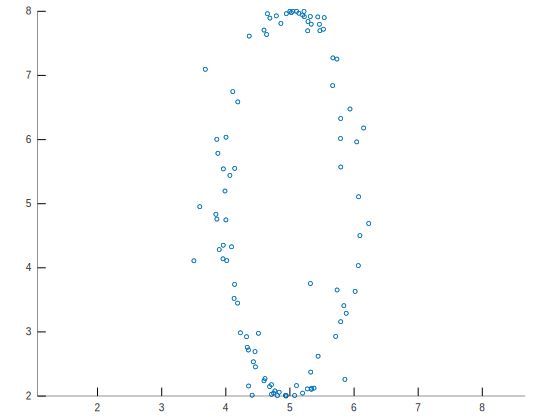

In [240]:
scatter(data(:, 1), data(:, 2));
axis equal;

## 2. Propose a generative model

I propose that the underlying model is an ellipse with major axis on y-axis, and minor axis on x-axis. Center of the ellipse is on point (5,5), the length of the semi-major axis is 3 and the length of the semi-minor axis is 1. Overall, each point on the ellipse can be expressed using the parametric formula of the ellipse:

   $$
    x(t) = a\cos t + xCenter \\
    y(t) = b\sin t + yCenter
   $$ 

where $a$ is the length of the semi-minor axis, $b$ is the length of the semi-minor axis and $t$ is the angle of the line from the center of the ellipse to the point on the ellipse. 

## 3. Implement your generative model and sample data from your model 

In [241]:
function [x y] = ellipse(a, b, cx, cy)
    r = linspace(0, 2 * pi, 100);

    x = cx + a * cos(r);
    y = cy + b * sin(r);
end

function [x, y] = addNoise(x, y, std)
    x = x + std * randn(1, length(x));
    y = y + std * randn(1, length(y));
end

## 4. Visualize synthetic data to show that your model generates a 'similar dataset' 

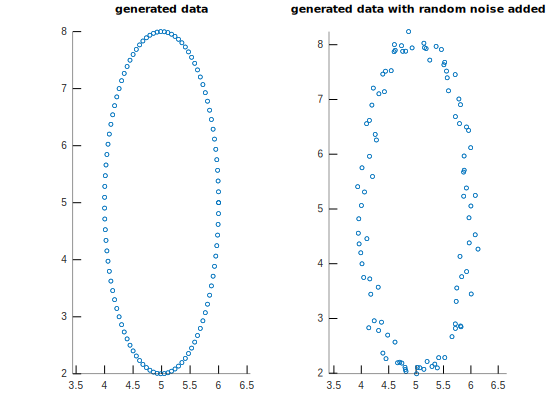

In [242]:
% generated data
subplot(1,2,1)
[x, y] = ellipse(1, 3, 5, 5);
scatter(x, y);
axis equal;
title('generated data');

% generated data with noise added
subplot(1,2,2)
[x, y] = addNoise(x, y, 0.1);
scatter(x, y);
axis equal;
title('generated data with random noise added');


Generated data with random noise added looks fairly similar to the original data plotted above. 

## 5. How can you assess if two datasets are similar? Discuss

We may calculate the mean squared error. We know the equation for an ellipse is:

$$
 \left(\frac{x - xCenter}{a}\right)^2 + \left(\frac{y - yCenter}{b}\right)^2 = 1
$$

So for each given $x$ in the dataset we can find two different $y$ values because our model has the remaining parameters. This is a problem and the solution I'll be proposing is a bad one because it assumes I know the $y$ values: We can take the $y$ value that is closest to our $y$ value as the predicted $y$ value, let's call it $y'$. For all $y$, we can calculate $(y- y')^2$ and then average them. If the result is a large number then our datasets are not similar, if it is a small number then our datasets our similar. 

We may also assume that our data distributes elliptically and estimate the parameters of the ellipse, then compare them to the parameters of the ellipse I have proposed. For instance we may say that an estimate for $xCenter$ is the mean of all $x$ values and an estimate for $yCenter$ is the mean of all $y$ values. I couldn't figure out a way to estimate $a$ and $b$, but it is probably possible. Methods I proposed have a disadvantage: all of them assume that data distributes elliptically and this assumption depends on mere visualization. 
